In [70]:
!pip3 uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip3 install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.2.0.34:
  Successfully uninstalled opencv-python-4.2.0.34
  Using cached https://files.pythonhosted.org/packages/40/ad/da7a60218f8256edda6278aaf0d7434e9b993ef15c7df17cb0d65f121b84/opencv_contrib_python-3.4.2.17-cp37-cp37m-macosx_10_6_x86_64.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/64/1e/982848d4e7b57ed06fbaed251a94d592cc59ebba83e454028f33866d4911/numpy-1.18.4-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17


In [71]:
!pip3 install opencv-contrib-python==3.4.2.17 

In [1]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt

## Getting Keypoints of an Image

In [2]:
image1=cv2.imread('img/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('img/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

### Sift Detector for getting Keypoints

In [3]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

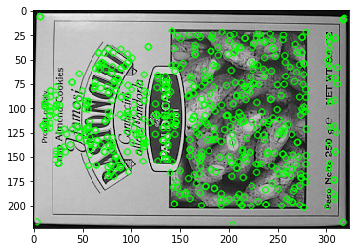

In [4]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

### Extracting Feature(patch) around (15,15)

In [249]:
p = (15,15)
vec = image1[p[0]-1:p[0]+2, p[1]-1:p[1]+2]
vec.flatten()

array([196, 195, 198, 196, 196, 199, 197, 196, 198], dtype=uint8)

## Displaying Keypoints on both Images

Text(0.5, 0, '(b)')

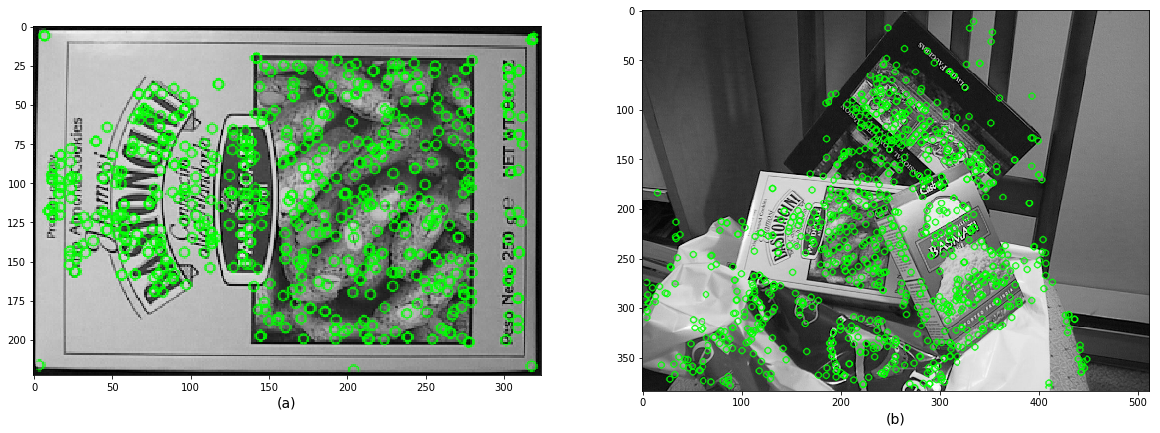

In [8]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

## Matching the Keypoints on both the Images

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 4.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  9.  3. 14.]
 [26.  0.  0. ...  0.  2.  1.]]


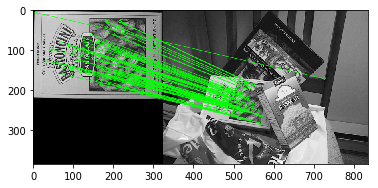

In [9]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

# Panaroma 

## Stitching 2 Images to form a Panaroma

In [307]:
image1=cv2.imread('img/Panorama/Eg1/img2_2.png')
image2=cv2.imread('img/Panorama/Eg1/img2_1.png')

image1_o=cv2.imread('img/Panorama/Eg1/img2_2.png')
image2_o=cv2.imread('img/Panorama/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image1_o=cv2.cvtColor(image1_o,cv2.COLOR_BGR2RGB)
image2_o=cv2.cvtColor(image2_o,cv2.COLOR_BGR2RGB)

### Getting Keypoints

In [308]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

NameError: name 'orb' is not defined

In [309]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

### Displaying Keypoints of both Images

Text(0.5, 0, '(b)')

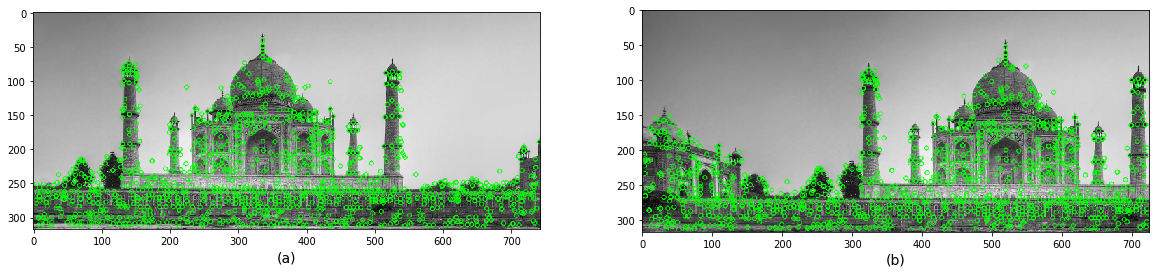

In [310]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

### Matching similar features across the two Images

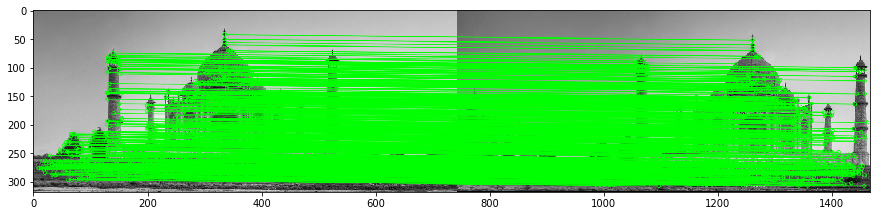

In [311]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)

fig = plt.figure(figsize = (15,20))
plt.imshow(img3)

### Applying Homography on the matching points in the second Image

###### This makes the overlapping part of both images exactly the same

In [312]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

### Stitching the two Images together

###### Warps the right image so its overlapping keypoints are in the same position as that of the left image, then places the left image on top in it's position

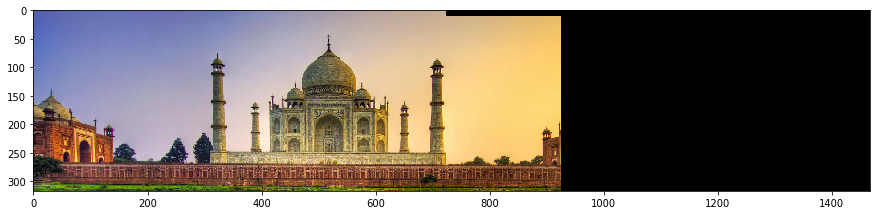

In [313]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst[0:image2.shape[0],0:image2.shape[1]] = image2

fig = plt.figure(figsize = (15,20))
plt.imshow(dst)


Text(0.5, 1.0, 'Panorama')

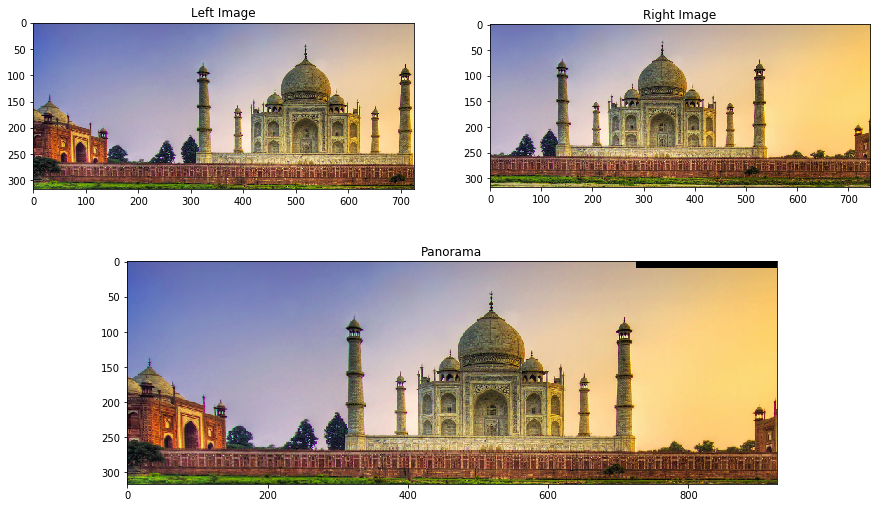

In [314]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

fig = plt.figure(figsize = (15,9))

plt.subplot(221)
plt.imshow(image2_o)
plt.title("Left Image")
plt.subplot(222)
plt.imshow(image1_o)
plt.title("Right Image")
plt.subplot(212)
plt.imshow(trim(dst))
plt.title("Panorama")
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

## Custom Clicked Images

### Image-1

In [346]:
imgl=cv2.imread('img/Panorama/custom/img_l.jpg')
imgr=cv2.imread('img/Panorama/custom/img_r.jpg')

imgl_gray=cv2.cvtColor(imgl,cv2.COLOR_BGR2GRAY)
imgr_gray=cv2.cvtColor(imgr,cv2.COLOR_BGR2GRAY)

imgl=cv2.cvtColor(imgl,cv2.COLOR_BGR2RGB)
imgr=cv2.cvtColor(imgr,cv2.COLOR_BGR2RGB)


In [347]:
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imgl_gray,None)
kp2, des2 = sift.detectAndCompute(imgr_gray,None)

Text(0.5, 0, '(b)')

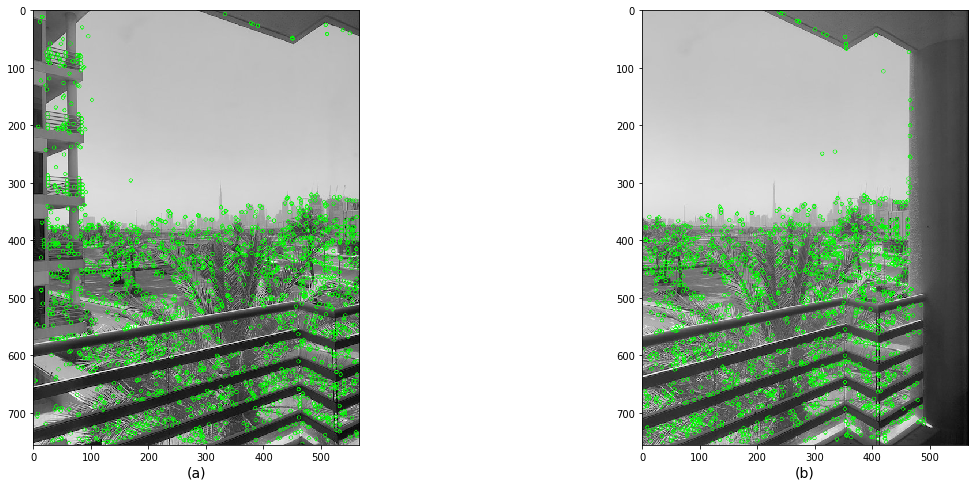

In [348]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(imgl_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(imgr_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

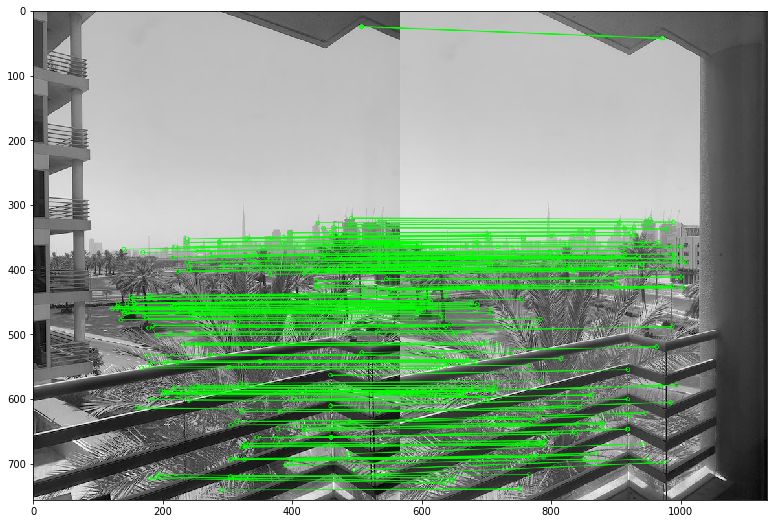

In [349]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)
img3 = cv2.drawMatches(imgl_gray,kp1,imgr_gray,kp2,good,None,**draw_params)
fig = plt.figure(figsize = (15,9))
plt.imshow(img3)

In [350]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

Text(0.5, 1.0, 'Panorama')

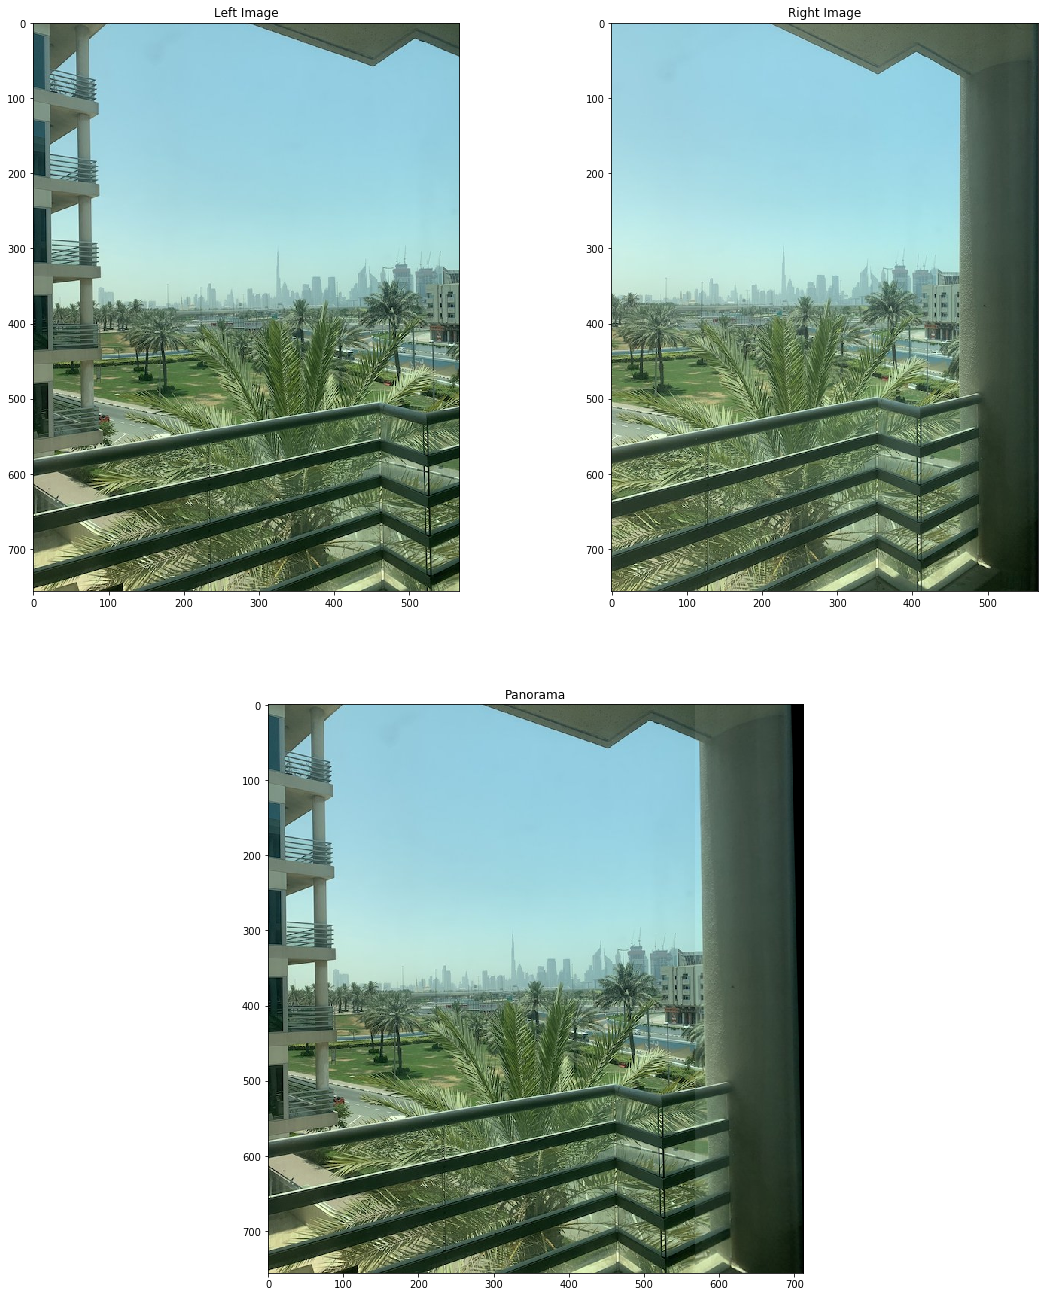

In [351]:
dst = cv2.warpPerspective(imgr,M,(imgr.shape[1] + imgl.shape[1], imgr.shape[0]))
dst[0:imgl.shape[0],0:imgl.shape[1]] = imgl

fig = plt.figure(figsize = (19,23))
plt.subplot(221)
plt.imshow(imgl)
plt.title("Left Image")
plt.subplot(222)
plt.imshow(imgr)
plt.title("Right Image")
plt.subplot(212)
plt.imshow(trim(dst))
plt.title("Panorama")

### Image-2

In [325]:
imgl=cv2.imread('img/Panorama/custom2/img2_l.jpg')
imgr=cv2.imread('img/Panorama/custom2/img2_r.jpg')

imgl_gray=cv2.cvtColor(imgl,cv2.COLOR_BGR2GRAY)
imgr_gray=cv2.cvtColor(imgr,cv2.COLOR_BGR2GRAY)

imgl=cv2.cvtColor(imgl,cv2.COLOR_BGR2RGB)
imgr=cv2.cvtColor(imgr,cv2.COLOR_BGR2RGB)

sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imgl_gray,None)
kp2, des2 = sift.detectAndCompute(imgr_gray,None)

Text(0.5, 0, '(b)')

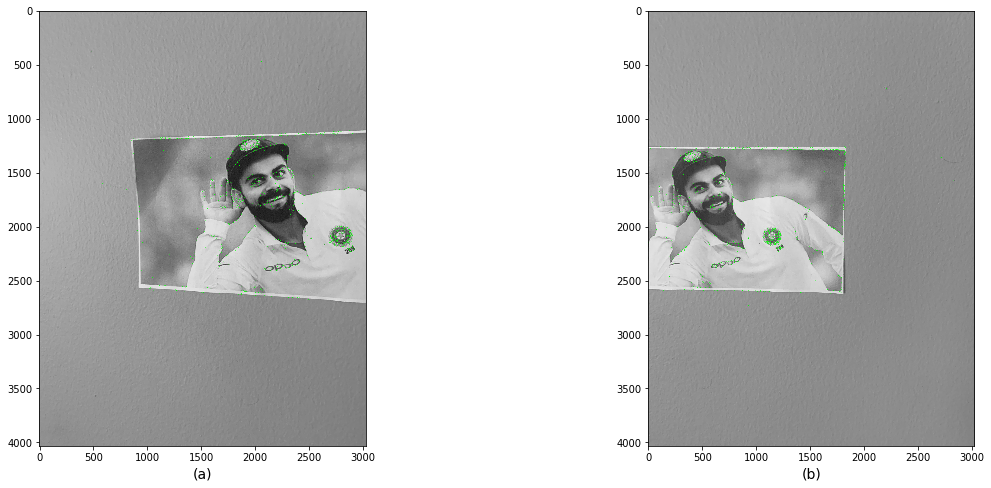

In [326]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(imgl_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(imgr_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

Text(0.5, 1.0, 'Mapping')

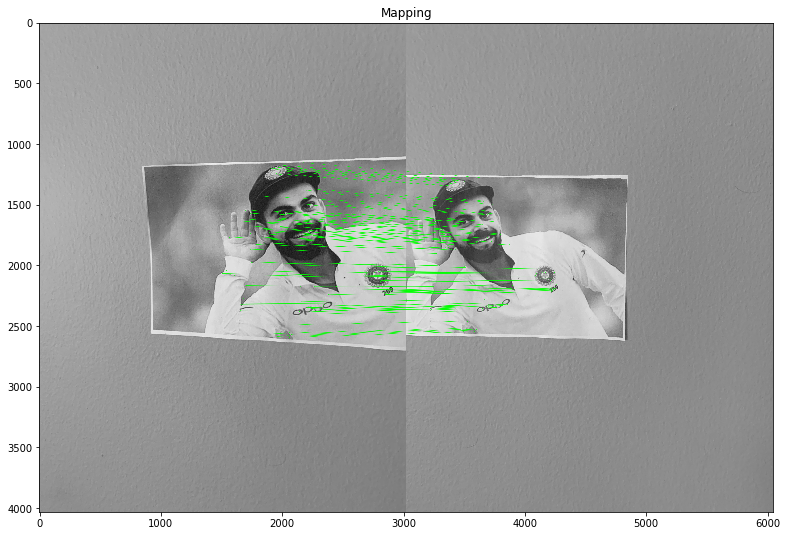

In [330]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)
img3 = cv2.drawMatches(imgl_gray,kp1,imgr_gray,kp2,good,None,**draw_params)
fig = plt.figure(figsize = (15,9))
plt.imshow(img3)
plt.title("Mapping")

In [331]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

Text(0.5, 1.0, 'Panorama')

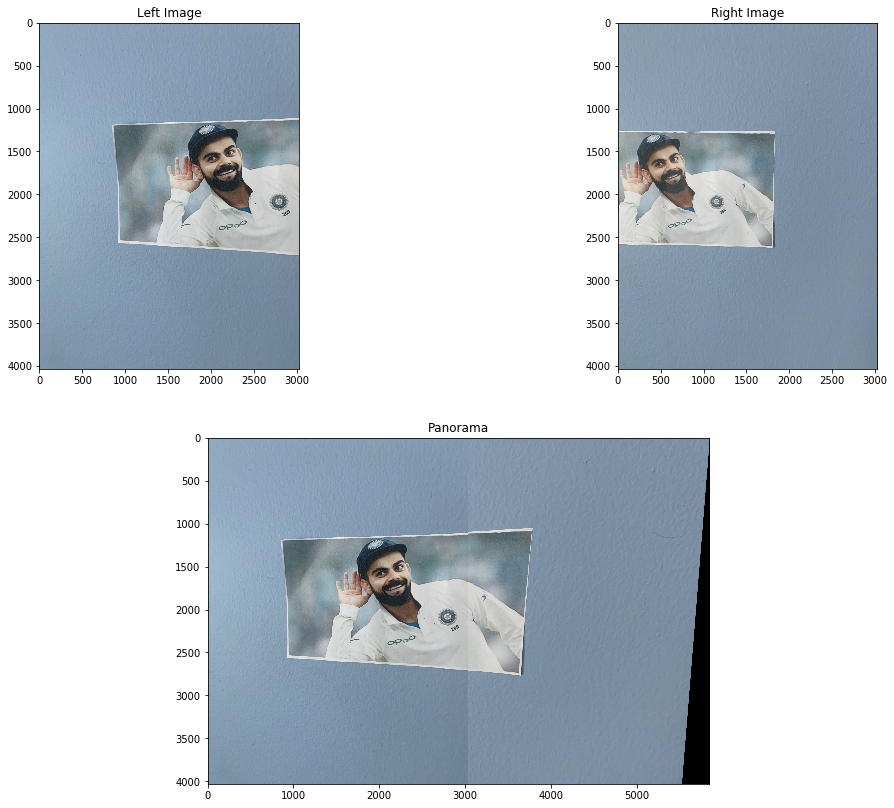

In [332]:
dst = cv2.warpPerspective(imgr,M,(imgr.shape[1] + imgl.shape[1], imgr.shape[0]))
dst[0:imgl.shape[0],0:imgl.shape[1]] = imgl

fig = plt.figure(figsize = (19,14))
plt.subplot(221)
plt.imshow(imgl)
plt.title("Left Image")
plt.subplot(222)
plt.imshow(imgr)
plt.title("Right Image")
plt.subplot(212)
plt.imshow(trim(dst))
plt.title("Panorama")

In [334]:
imgl=cv2.imread('img/Panorama/custom3/img3_l.jpg')
imgr=cv2.imread('img/Panorama/custom3/img3_r.jpg')

imgl_gray=cv2.cvtColor(imgl,cv2.COLOR_BGR2GRAY)
imgr_gray=cv2.cvtColor(imgr,cv2.COLOR_BGR2GRAY)

imgl=cv2.cvtColor(imgl,cv2.COLOR_BGR2RGB)
imgr=cv2.cvtColor(imgr,cv2.COLOR_BGR2RGB)

sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imgl_gray,None)
kp2, des2 = sift.detectAndCompute(imgr_gray,None)

Text(0.5, 0, '(b)')

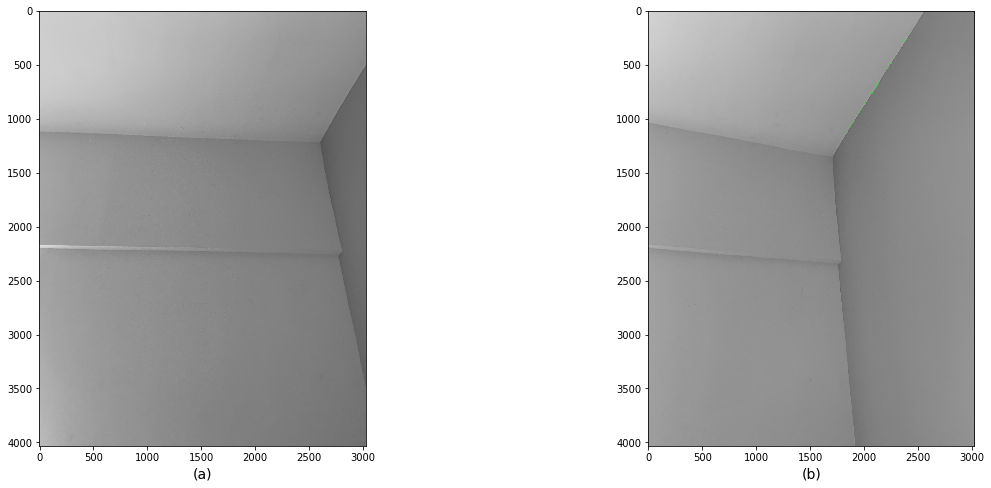

In [335]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(imgl_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(imgr_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

Text(0.5, 1.0, 'Mapping')

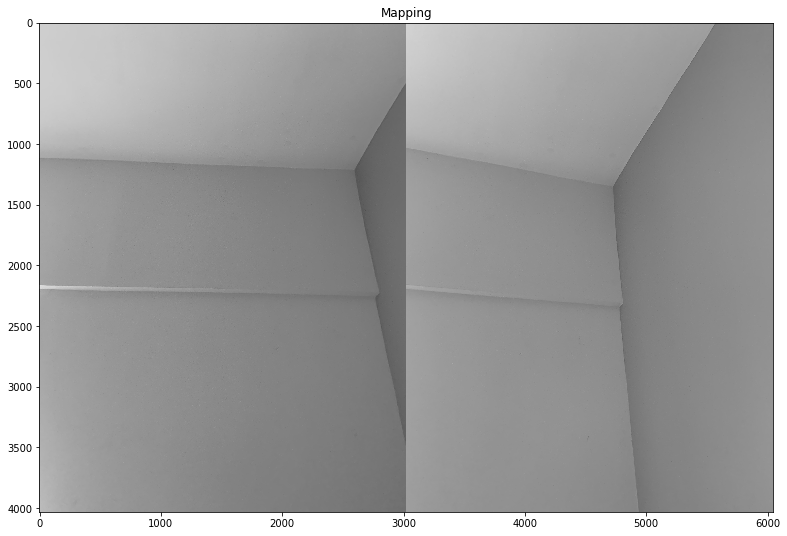

In [336]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)
img3 = cv2.drawMatches(imgl_gray,kp1,imgr_gray,kp2,good,None,**draw_params)
fig = plt.figure(figsize = (15,9))
plt.imshow(img3)
plt.title("Mapping")

In [337]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Enough matches weren't found - %d/%d", (len(good)/MIN_MATCH_COUNT))

Not enought matches are found - %d/%d 0.0


#### Enough matches couldn't be found to create a panaroma

## Above Process as Functions

In [23]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = 10
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      #plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

# Homography for Alignment

Text(0.5, 1.0, 'Book Cover Extracted')

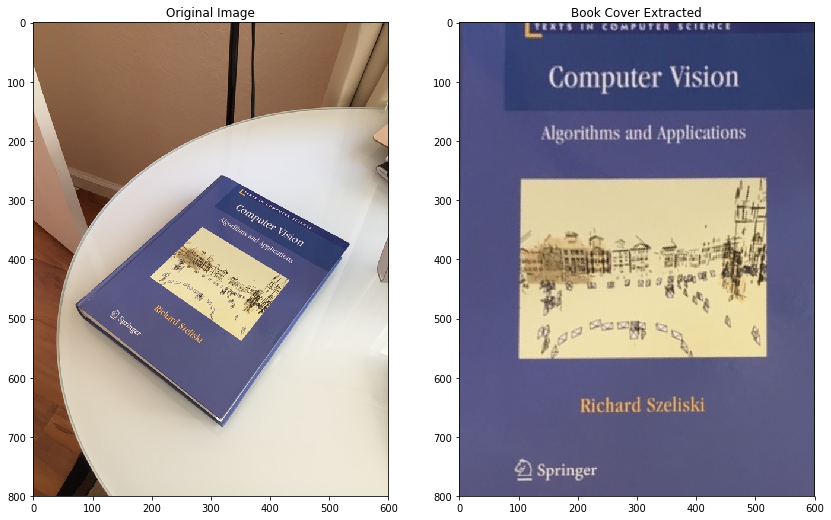

In [323]:
bk1 = cv2.imread("img/book1.jpg")
bk1 = bk1[:,:,::-1]
h, w = bk1.shape[:2]

src_pts = np.load("img/Points.npy")
op_pts = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]])

M, mask = cv2.findHomography(src_pts, op_pts)

dst = cv2.warpPerspective(bk1, M, (w, h))

fig = plt.figure(figsize = (14,10))

plt.subplot(121)
plt.imshow(bk1)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(dst)
plt.title("Book Cover Extracted")

### Aligning one plane to another

Text(0.5, 1.0, 'Book-2 warped to the shape of Book-1')

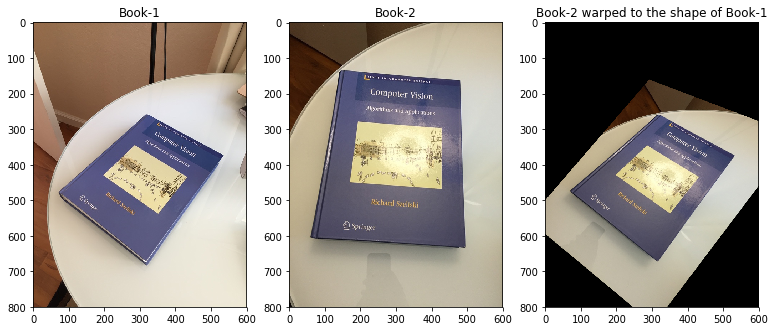

In [27]:
bk2 = cv2.imread("img/book2.jpg")
bk2 = bk2[:,:,::-1]

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

M, mask = cv2.findHomography(pts_src, pts_dst)

dst = cv2.warpPerspective(bk2, M, (w, h))


fig = plt.figure(figsize = (13,9))
plt.subplot(131)
plt.imshow(bk1)
plt.title("Book-1")
plt.subplot(132)
plt.imshow(bk2)
plt.title("Book-2")
plt.subplot(133)
plt.imshow(dst)
plt.title("Book-2 warped to the shape of Book-1")

## Depth Detection

### Inbuilt Function to find Depth

Text(0.5, 1.0, 'Truncating Unnecessary Depths')

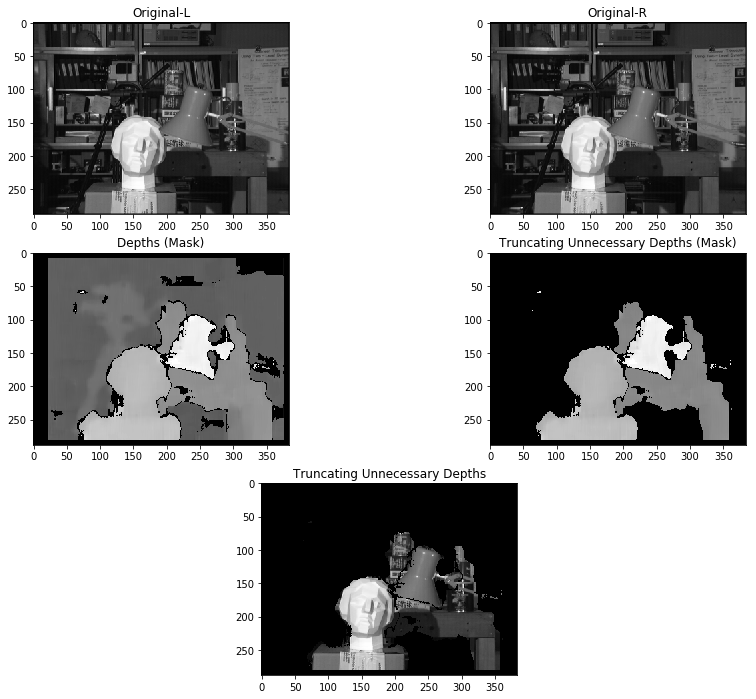

In [28]:
img_l = cv2.imread("img/tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
img_r = cv2.imread("img/tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
img_trunc = cv2.imread("img/tsukuba_l.png", cv2.IMREAD_GRAYSCALE)

s = cv2.StereoBM_create(numDisparities=16, blockSize=15) 
disparity = s.compute(img_l,img_r)
trunc = s.compute(img_l,img_r)
trunc[trunc < 120] = 0
img_trunc[disparity < 120] = 0 

fig = plt.figure(figsize = (15,12))

plt.subplot(321)
plt.imshow(img_l, 'gray')
plt.title("Original-L")
plt.subplot(322)
plt.imshow(img_r, 'gray')
plt.title("Original-R")
plt.subplot(323)
plt.imshow(disparity, 'gray')
plt.title("Depths (Mask)")
plt.subplot(324)
plt.imshow(trunc,'gray')
plt.title("Truncating Unnecessary Depths (Mask)")
plt.subplot(313)
plt.imshow(img_trunc,'gray')
plt.title("Truncating Unnecessary Depths")

## Self-Written Function to find Depth

In [228]:
v1 = cv2.imread("img/view0.png", cv2.IMREAD_GRAYSCALE)
v0 = cv2.imread("img/view1.png", cv2.IMREAD_GRAYSCALE)

h, w = v0.shape[:2]
h,w

(354, 400)

In [223]:
def get_cost(a, b, p_v0, p_v1, b_size):   
    r = int(b_size/2)
    ssd = 0
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            ssd += abs(p_v0[a[0]+i][a[1]+j].astype('int') - p_v1[b[0]+i][b[1]+j].astype('int'))
    return ssd

def get_depth(b_size):
    
    p_v0 = np.zeros((h+2*b_size, w+2*b_size))
    p_v1 = np.zeros((h+2*b_size, w+2*b_size))
    p_v0[b_size:h+b_size, b_size:w+b_size] = v0
    p_v1[b_size:h+b_size, b_size:w+b_size] = v1

    min_cost = [[-1 for i in range(w+b_size)] for j in range(h+b_size)]
    
    inds = [[(j,i) for i in range(w+b_size)] for j in range(h+b_size)]
    window_size = int(0.1*w/2)

    for i in range(b_size, h+b_size):
        for j in range(b_size, w+b_size):      
            for k in range(j, min(w+b_size, j+window_size)):

                cost = get_cost((i,j), (i,k), p_v0, p_v1, b_size)
                if min_cost[i][j] == -1 or cost < min_cost[i][j]:
                    min_cost[i][j] = cost
                    inds[i][j] = (i,k)
                    
    return inds, window_size

In [234]:
inds_1, ws_1 = get_depth(1)

In [232]:
inds_3, ws_3 = get_depth(3)

In [245]:
inds_5, ws_5 = get_depth(5)

In [246]:
b_size = 1
depth1 = np.zeros((h+2*b_size, w+2*b_size))
for i in range(b_size, h+b_size):
    for j in range(b_size, w+b_size):   
        depth1[i][j] = (inds_1[i][j][1] - j)/ws_1
depth1*=255

b_size = 3
depth3 = np.zeros((h+2*b_size, w+2*b_size))
for i in range(b_size, h+b_size):
    for j in range(b_size, w+b_size):   
        depth3[i][j] = (inds_3[i][j][1] - j)/ws_3
depth3*=255

b_size = 5
depth5 = np.zeros((h+2*b_size, w+2*b_size))
for i in range(b_size, h+b_size):
    for j in range(b_size, w+b_size):   
        depth5[i][j] = (inds_5[i][j][1] - j)/ws_5
depth5*=255
# Higher block sizes take a long time to compute, but can be added

#In-built function 
s = cv2.StereoBM_create(numDisparities=16, blockSize=5) 
disparity = s.compute(v1,v0)

Text(0.5, 1.0, 'Depth (In-Built Function) [Block size: 5]')

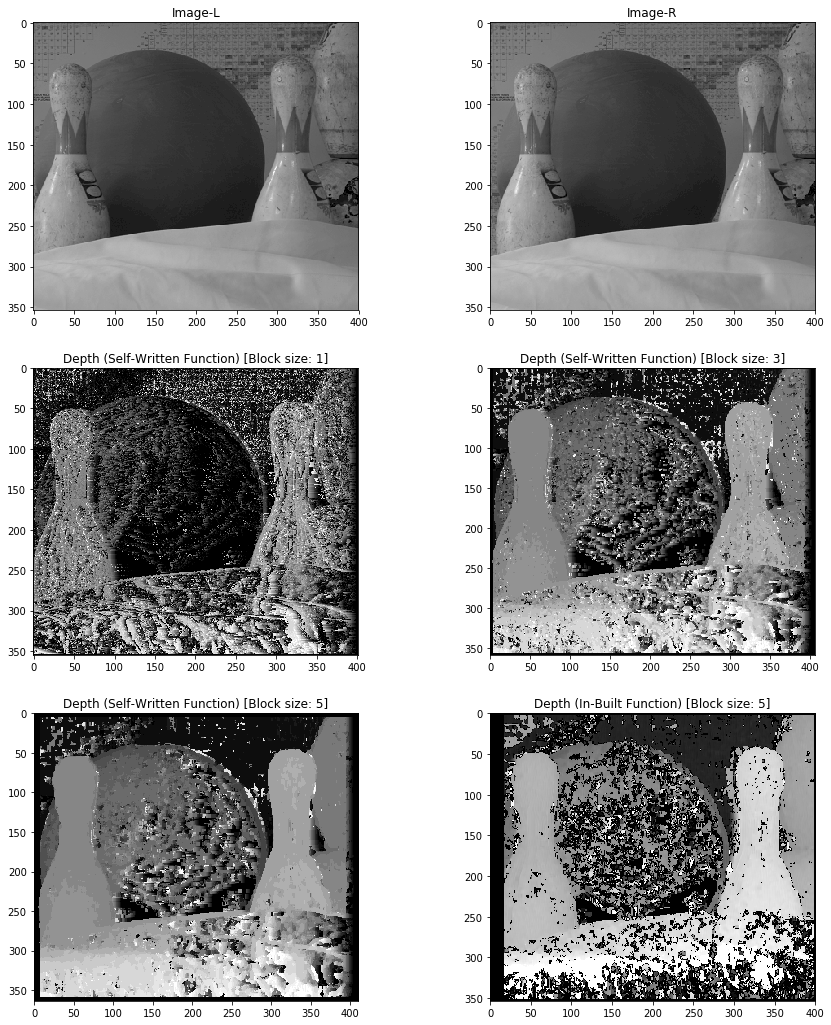

In [248]:
fig = plt.figure(figsize = (15,18))

plt.subplot(321)
plt.imshow(v0, 'gray')
plt.title("Image-L")
plt.subplot(322)
plt.imshow(v1, 'gray')
plt.title("Image-R")
plt.subplot(323)
plt.imshow(depth1, 'gray')
plt.title("Depth (Self-Written Function) [Block size: 1]")
plt.subplot(324)
plt.imshow(depth3, 'gray')
plt.title("Depth (Self-Written Function) [Block size: 3]")
plt.subplot(325)
plt.imshow(depth5, 'gray')
plt.title("Depth (Self-Written Function) [Block size: 5]")
plt.subplot(326)
plt.imshow(disparity, 'gray')
plt.title("Depth (In-Built Function) [Block size: 5]")